In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier  # Import for Neural Network

# Load SSL dataset
ssl_data = pd.read_csv('/content/SSL.csv')

target_column = 'LABEL'

# Split features and target for SSL dataset
X_ssl = ssl_data.drop(columns=[target_column]).values
y_ssl = ssl_data[target_column].values

# Define models to train
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=500)  # Neural Network model
}

# Function to train models with cross-validation and store results
def train_and_evaluate(X, y, dataset_name):
    results = []
    for model_name, model in models.items():
        # Perform 5-fold cross-validation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

        # Train/test split for evaluation metrics
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        results.append({
            'Model': f"{dataset_name} + {model_name}",
            'Cross-Validation Accuracy': np.mean(cv_scores),
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        })

    return results

# Train and evaluate models on the SSL dataset
ssl_results = train_and_evaluate(X_ssl, y_ssl, 'SSL')

# Combine results into a single DataFrame
results_df = pd.DataFrame(ssl_results)

# Display overall results
print(results_df[['Model', 'Cross-Validation Accuracy', 'Precision', 'Recall', 'F1-Score']])


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                       Model  Cross-Validation Accuracy  Precision    Recall  \
0        SSL + Random Forest                   0.894249   0.885327  0.853659   
1                  SSL + KNN                   0.830352   0.854268  0.841463   
2                  SSL + SVM                   0.845167   0.892683  0.853659   
3  SSL + Logistic Regression                   0.842728   0.903528  0.865854   
4       SSL + Neural Network                   0.813219   0.832825  0.804878   

   F1-Score  
0  0.855338  
1  0.832086  
2  0.848626  
3  0.870016  
4  0.801520  


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

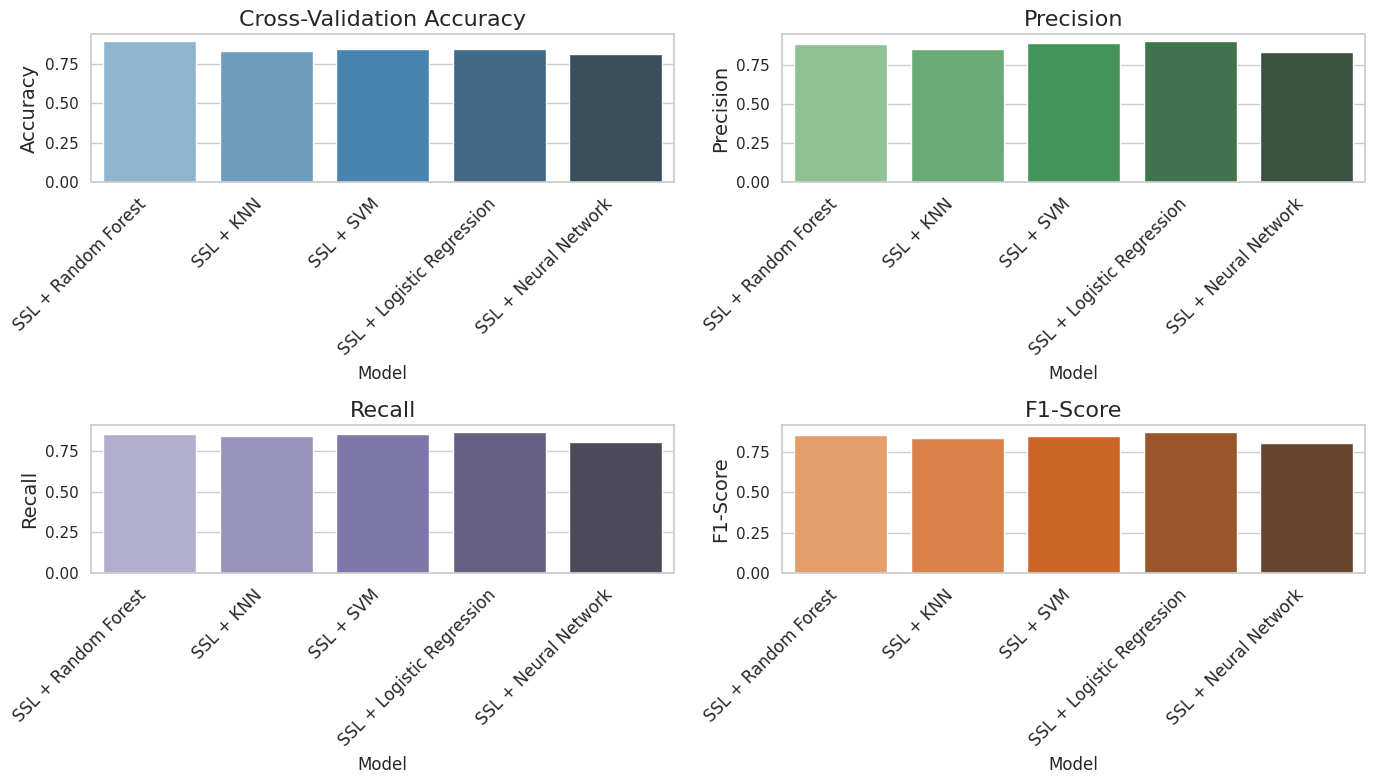

In [3]:
# Train and evaluate models on the SSL dataset
ssl_results = train_and_evaluate(X_ssl, y_ssl, 'SSL')

# Convert results into a DataFrame for easy plotting
results_df = pd.DataFrame(ssl_results)

# Set up the plot size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot Cross-Validation Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Cross-Validation Accuracy', data=results_df, palette='Blues_d')
plt.title('Cross-Validation Accuracy', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Accuracy', fontsize=14)

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=results_df, palette='Greens_d')
plt.title('Precision', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Precision', fontsize=14)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=results_df, palette='Purples_d')
plt.title('Recall', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Recall', fontsize=14)

# Plot F1-Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1-Score', data=results_df, palette='Oranges_d')
plt.title('F1-Score', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('F1-Score', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-5-91e740797763>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Cross-Validation Accuracy', data=results_df, palette='Blues_d')


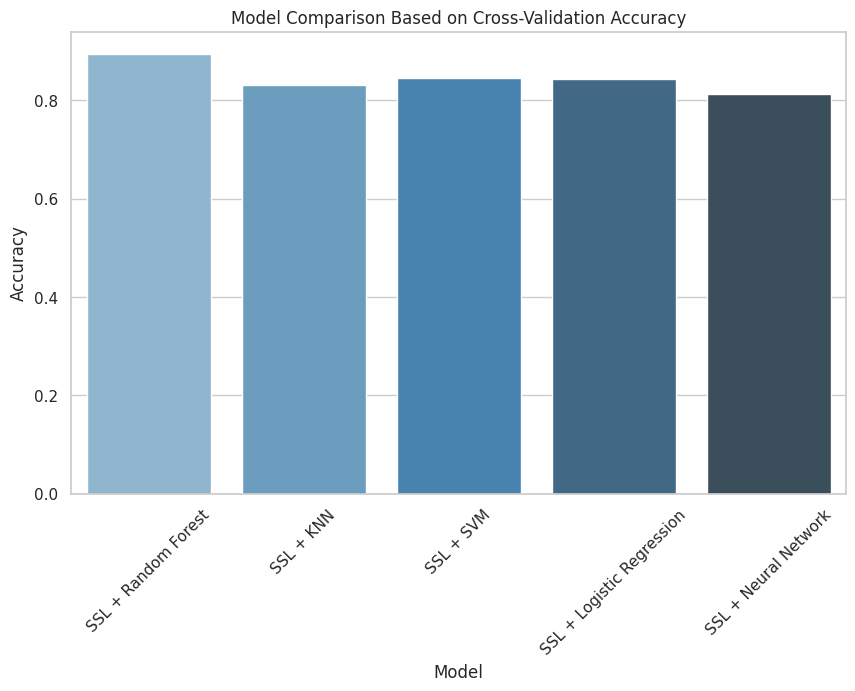


Best Model: SSL + Random Forest
Cross-Validation Accuracy: 0.8942
Precision: 0.8853
Recall: 0.8537
F1-Score: 0.8553
Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 1 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate the best model based on F1-Score or Cross-Validation Accuracy
def evaluate_and_plot(results_df):
    # Find the best model based on Cross-Validation Accuracy
    best_model_row = results_df.loc[results_df['Cross-Validation Accuracy'].idxmax()]
    best_model_name = best_model_row['Model']

    # Benchmarking Cross-Validation Accuracy for all models
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Cross-Validation Accuracy', data=results_df, palette='Blues_d')
    plt.title('Model Comparison Based on Cross-Validation Accuracy')
    plt.xticks(rotation=45)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.show()

    # Display the best model's detailed performance metrics
    print(f"\nBest Model: {best_model_name}")
    print(f"Cross-Validation Accuracy: {best_model_row['Cross-Validation Accuracy']:.4f}")
    print(f"Precision: {best_model_row['Precision']:.4f}")
    print(f"Recall: {best_model_row['Recall']:.4f}")
    print(f"F1-Score: {best_model_row['F1-Score']:.4f}")
    print(f"Confusion Matrix:\n{best_model_row['Confusion Matrix']}")

# Assuming `results_df` contains your results
evaluate_and_plot(results_df)


In [10]:
from sklearn.model_selection import GridSearchCV

# Function for hyperparameter tuning
def hyperparameter_tuning_rf(X, y):
    # Hyperparameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
        'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
        'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
    }

    # Create a Random Forest model
    rf = RandomForestClassifier(random_state=42)

    # GridSearchCV for Random Forest
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X, y)

    # Return the best model
    return grid_search.best_estimator_

# Perform hyperparameter tuning on the Random Forest model
best_rf_model = hyperparameter_tuning_rf(X_ssl, y_ssl)

# After hyperparameter tuning, evaluate the model's performance
from sklearn.model_selection import cross_val_score
final_scores = cross_val_score(best_rf_model, X_ssl, y_ssl, cv=5, scoring='accuracy')

print("\nBest Random Forest Model after Hyperparameter Tuning:")
print(f"Best Parameters: {best_rf_model.get_params()}")
print(f"Final Cross-Validation Accuracy: {final_scores.mean():.4f}")

# Now let's evaluate the final performance of the tuned model on the test set
X_train, X_test, y_train, y_test = train_test_split(X_ssl, y_ssl, test_size=0.2, random_state=42)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

# Calculate and display the final evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nFinal Performance Metrics on Test Set:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Random Forest Model after Hyperparameter Tuning:
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Final Cross-Validation Accuracy: 0.9066

Final Performance Metrics on Test Set:
Precision: 0.9173
Recall: 0.8780
F1-Score: 0.8779
Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [1 1 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


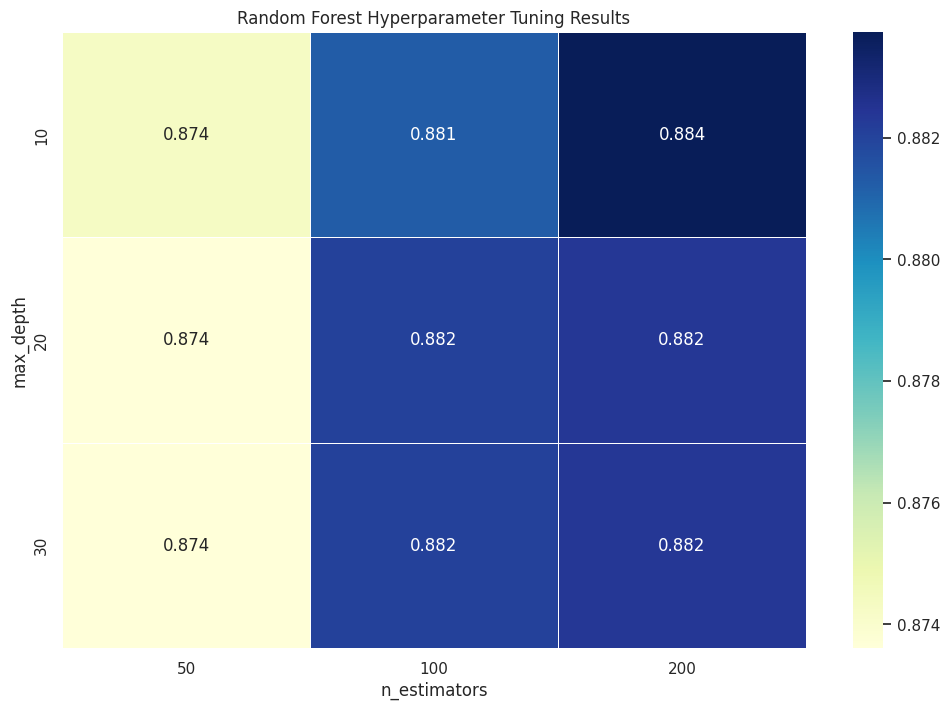

Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to perform hyperparameter tuning and store results for visualization
def hyperparameter_tuning_rf_with_results(X, y):
    # Hyperparameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
        'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
        'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
    }

    # Create a Random Forest model
    rf = RandomForestClassifier(random_state=42)

    # GridSearchCV for Random Forest
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X, y)

    # Store the results of the grid search in a DataFrame
    results_df = pd.DataFrame(grid_search.cv_results_)

    return grid_search.best_estimator_, results_df

# Perform hyperparameter tuning and get the results DataFrame
best_rf_model, tuning_results_df = hyperparameter_tuning_rf_with_results(X_ssl, y_ssl)

# Plot heatmap of the hyperparameter tuning results (mean_test_score vs max_depth and n_estimators)
plt.figure(figsize=(12, 8))
sns.heatmap(tuning_results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score'),
            annot=True, cmap="YlGnBu", fmt=".3f", linewidths=0.5)
plt.title(f"Random Forest Hyperparameter Tuning Results")
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

# Output the best parameters found by GridSearchCV
print(f"Best Parameters: {best_rf_model.get_params()}")


<ipython-input-6-5db892305d18>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Training Accuracy', 'Testing Accuracy'], y=[train_accuracy, test_accuracy], palette='viridis')


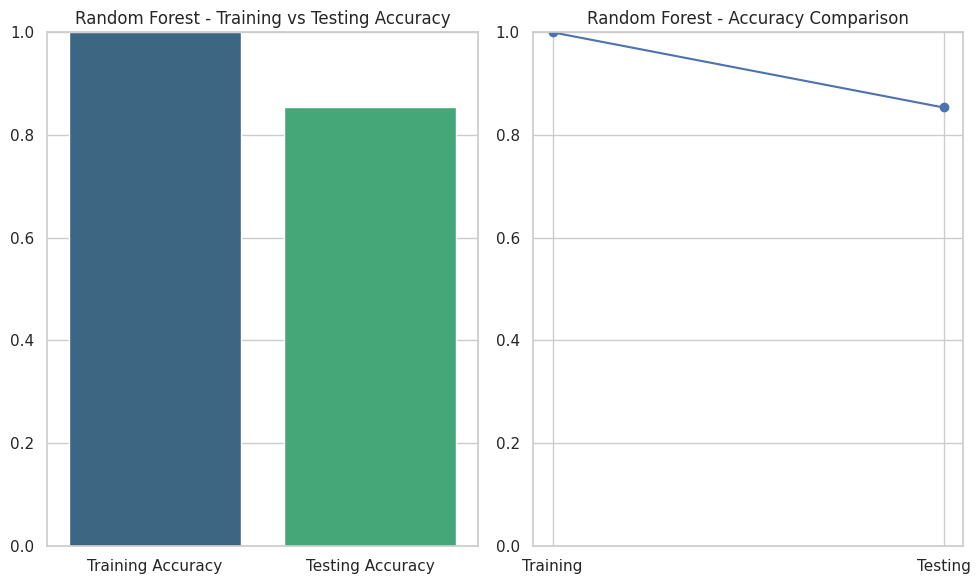


Random Forest is overfitting!
Random Forest Training Accuracy: 1.0000
Random Forest Testing Accuracy: 0.8537


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to check overfitting and plot training vs testing accuracy
def check_overfitting_and_plot(X, y, model, model_name):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict on training and testing data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate training and testing accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Bar plot for training vs testing accuracy
    plt.subplot(1, 2, 1)
    sns.barplot(x=['Training Accuracy', 'Testing Accuracy'], y=[train_accuracy, test_accuracy], palette='viridis')
    plt.title(f'{model_name} - Training vs Testing Accuracy')
    plt.ylim(0, 1)

    # Line plot for training vs testing accuracy
    plt.subplot(1, 2, 2)
    plt.plot(['Training', 'Testing'], [train_accuracy, test_accuracy], marker='o', color='b')
    plt.title(f'{model_name} - Accuracy Comparison')
    plt.ylim(0, 1)
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()

    # Check for overfitting
    if train_accuracy > test_accuracy:
        print(f"\n{model_name} is overfitting!")
    else:
        print(f"\n{model_name} is not overfitting.")

    # Display the accuracy values
    print(f"{model_name} Training Accuracy: {train_accuracy:.4f}")
    print(f"{model_name} Testing Accuracy: {test_accuracy:.4f}")

# Example usage:
# Assuming best_model is the best model from the previous results
best_model = RandomForestClassifier(random_state=42)  # Replace with the best model
X_ssl = ssl_data.drop(columns=[target_column]).values
y_ssl = ssl_data[target_column].values

# Check overfitting and plot for the best model
check_overfitting_and_plot(X_ssl, y_ssl, best_model, 'Random Forest')  # Change 'Random Forest' to your best model's name
